**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources: Marco Peixeiro, Soner Yıldırım, Bex T, Manuel Hupperich, Youssef Hosni and Piero Paialunga en www.towardsdatascience.com. Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# Time Series Analysis: Stationarity

A stationary time series is one whose statistical properties do not change over time. In other
words, it is not depending on time component and it has a constant mean, constant variance, and constant autocorrelation structure (i.e. the pattern of autocorrelation does not change over time).

Many forecasting models assume stationarity. The moving average model, autoregressive model, and autoregressive moving average model assume stationarity. These models can only be used if we verify that the data is indeed
stationary. Otherwise, the models will not be valid, and the forecasts will not be reliable.
Intuitively, this makes sense, because if the data is non-stationary, its properties are going
change over time, and so it would mean that our model parameters must also change
through time. This means that we cannot possibly derive a function of future values as a
function of past values, since the coefficients change at each point in time, hence making
forecasting unreliable.

A stationary series shows a Gaussian distribution, and the mean and variance are similar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
levels = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Analysis/DJI.csv', parse_dates=['Date'], index_col='Date')
levels.head()

,DJI,UFO
Date,,
1941-01-01,110.96,1
1942-01-01,119.40,2
1943-01-01,135.89,9
1944-01-01,152.32,9
1945-01-01,192.91,9


## Spurious correlations in time series data

De acuerdo con [Wikipedia](https://es.wikipedia.org/wiki/Relaci%C3%B3n_espuria#:~:text=Un%20caso%20bien%20conocido%20de,entre%20variables%20independientes%20no%20estacionarias.) una relación espuria (o, a veces, correlación espuria) es una relación matemática en la cual dos acontecimientos no tienen conexión lógica, aunque se puede implicar que la tienen debido a un tercer factor no considerado aún (llamado "factor de confusión" o "variable escondida"). La relación espuria da la impresión de la existencia de un vínculo apreciable entre dos grupos que es inválido cuando se examina objetivamente.

En series temporales las correlaciones espurias son frecuentes, simplemente porque muchas series tienen tendencia.

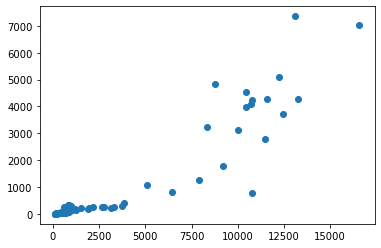

In [ ]:
plt.scatter(levels.DJI, levels.UFO);

In [5]:
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

Correlation of levels:  0.9204594155244163


In [6]:
# Compute correlation of percent changes
changes = levels.pct_change()
changes.head()

,DJI,UFO
Date,,
1941-01-01,NaN,NaN
1942-01-01,0.076063,1.0
1943-01-01,0.138107,3.5
1944-01-01,0.120907,0.0
1945-01-01,0.266478,0.0


In [ ]:
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of changes:  0.009287288259357323


## Regresión Lineal

In [7]:
# Compute correlation of x and y

data = levels.dropna()
x = data['DJI']
y = data['UFO']

correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))


The correlation between x and y is 0.92


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


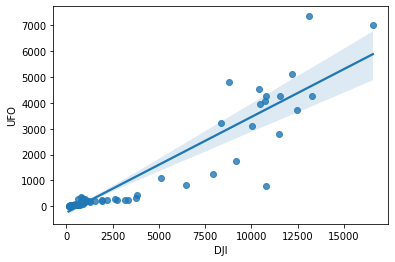

In [8]:
import seaborn as sbn
sbn.regplot(x,y)

In [9]:
# Import the statsmodels module
import statsmodels.api as sm

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x.values, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y.values, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     393.8
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.10e-30
Time:                        15:57:58   Log-Likelihood:                -581.51
No. Observations:                  73   AIC:                             1167.
Df Residuals:                      71   BIC:                             1172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -247.2650    105.184     -2.351      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [10]:
dfx1.head()

,const,x
0,1.0,110.96
1,1.0,119.40
2,1.0,135.89
3,1.0,152.32
4,1.0,192.91


In [ ]:
correlation*correlation

0.8472455356275501

## Testing for stationarity

**ADF (Augmented Dickey-Fuller)** test examines stationarity based on the null hypothesis that data is non-stationary and alternative hypothesis that data is stationary. The result of this test is the ADF statistic that is a negative number. The more negative it is, the stronger the rejection of the null hypothesis. If the p-value generated from the ADF test is smaller than 0.05, it provides stronger evidence to reject that data is non-stationary.

1.7706584776801464
0.998289012539757


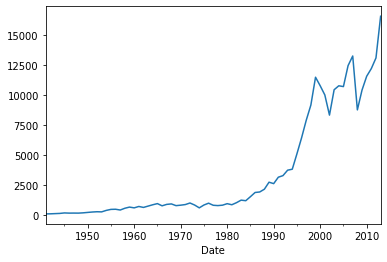

In [ ]:
from statsmodels.tsa.stattools import adfuller
data = levels.dropna()
dji = data['DJI']
results = adfuller(dji)
print(results[0]) # print ADF statistic
print(results[1]) # print the p-value 
dji.plot();

The p-value is 0.9 which means that the difference is not significant and we cannot reject the null hypothesis therefore the DJI time series is non-stationary.

## Transformation
A transformation is simply a mathematical manipulation to
the data in order to stabilize its mean and variance, thus making it stationary. The simplest
transformation one can apply is differencing. This transformation helps stabilize the mean,
which in turn removes or reduces the trend and seasonality effects. Differencing is
calculating the series of change from one timestep to another. To accomplish that, we simply
subtract the value of the previous timestep from the value in the present to obtain the
differenced value.

It is possible to difference a time series many times. Taking the difference once is applying a
first-order differencing. Taking it a second time, would be a second-order differencing. It
is often not necessary to difference more than twice to obtain a stationary series.

While differencing is used to obtain a constant mean through time, we must also make
sure to have a constant variance in order for our process to be stationary. In such case,
logarithms are used to help stabilize the variance.

Keep in mind that when we model a time series that was transformed, we must
untransform it to bring back the results of the model to the original units of measurement.
Therefore, if you apply a log transformation to your data, make sure to raise your forecast
values to the power of 10, in order to bring the values back to their original magnitude. That
way, our predictions will make sense in their original context.

-7.420367376952998
6.761480792705851e-11


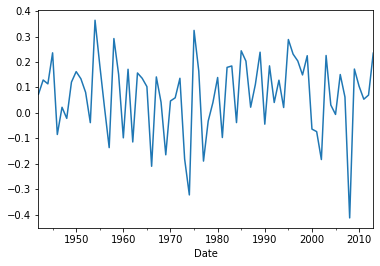

In [ ]:
dji_log=np.log(dji).diff(1)
dji_log=dji_log.dropna()
results = adfuller(dji_log)
print(results[0])
print(results[1])
dji_log.plot();

## Autocorrelation function (ACF)

Once a process is stationary, plotting the autocorrelation function is a great way to
understand what type of process we are analyzing.

We know that correlation measures the extent of a linear relationship between two
variables. Autocorrelation therefore measures the linear relationship between lagged values
of a time series. Thus, the autocorrelation function reveals how the correlation between any
two values changes as the lag increases. Here, the lag is simply the number of timesteps
separating two values.

or example, we can calculate the autocorrelation coefficient between $y_t$ and $y_{t−1}$. In this
case, the lag is equal to 1, and the coefficient would be denoted as r1. Similarly, we can
calculate the autocorrelation between $y_t$ and $y_{t−2}$. Then, the lag would be 2, and the
coefficient would be denoted as r2. When we plot the ACF function, the coefficient is the
dependent variable, while the lag is the independent variable. Note that the autocorrelation
coefficient at lag 0 will always be equal to 1.

In the presence of a trend when plotting the ACF, the coefficients will be high for short
lags, and we will see a linear decrease as the lag increases. If the data is seasonal, the ACF
plot will also display cyclical patterns. Therefore, plotting the ACF function of a non-
stationary process will not give us further information as to what we already know by looking
at the evolution of our process through time. However, plotting the ACF for a stationary
process can for instance help us identify the presence of a random walk.

In [ ]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

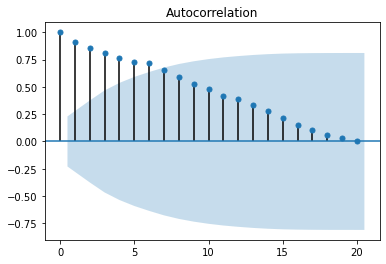

In [ ]:

# Plot the acf function
plot_acf(data['DJI'], lags=20, alpha=0.05)
plt.show()

Looking at the previous  figure, we notice how the autocorrelation coefficients slowly decrease as the
lag increases, which is a clear indicator that our random walk is not a stationary process.
Note that the shaded area represents a confidence interval. If a point is within the shaded
area, then it is not significantly different from 0. Otherwise, the autocorrelation coefficient is
significant.

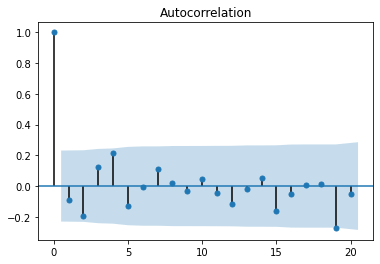

In [ ]:
plot_acf(dji_log, lags=20, alpha=0.05)
plt.show()


## Partial Autocorrelation function (PACF)
In an attempt to identify the order of a stationary autoregressive process, we used the ACF
plot just like we did for a moving average process. Unfortunately, the ACF plot cannot give
us this information and therefore we must turn to the partial autocorrelation function or
PACF.

Partial autocorrelation measures the correlation between lagged values in a time series when we remove the
influence of other correlated lagged values. We can plot the partial autocorrelation function to determine the order of
a stationary AR(p) process. The coefficients will be non-significant after lag p.

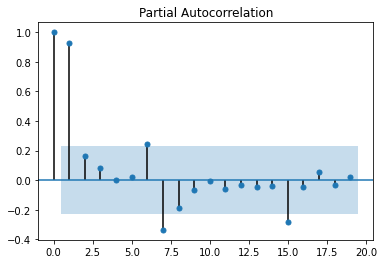

In [ ]:

plot_pacf(data['DJI'], alpha=0.05)
plt.show()

Looking at the previous figure, we notice that there are no significant autocorrelation coefficients
after lag 0. This means that the stationary process is completely random and can therefore
be described as white noise. Each value is simply a random step away from the previous one
with no relation between them.